In [6]:
# Variable Selection & Dimension Reduction

import pandas as pd
import numpy as np
from semopy import Model

In [16]:
df_combined = pd.read_csv("COMBINED_DATA.csv", low_memory=False)

In [17]:
df_sampled = df_combined.sample(frac=0.05, random_state=42).reset_index(drop=True)

In [18]:
df_sampled.to_csv("DR_subset.csv")

## 1. Feature Importance with RF

In [34]:
df_sampled = pd.read_csv("DR_subset.csv", low_memory=False)
df_sampled = df_sampled.drop(columns=['DECISION_DATE', 'RECEIVED_DATE','Unnamed: 0', 'Unnamed: 0.1', 'CASE_NUMBER', 'ï»¿CASE_NUMBER'])

In [20]:
'CASE_STATUS' in df_sampled.columns

True

In [10]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [35]:
df_numeric = df_sampled.select_dtypes(include=['number']).copy()
df_categorical = df_sampled.select_dtypes(include=['object']).copy()  

df_numeric = df_numeric.dropna(axis=1, how="all")
df_categorical = df_categorical.dropna(axis=1, how="all")

numeric_imputer = SimpleImputer(strategy="median")
df_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(df_numeric), columns=df_numeric.columns)

categorical_imputer = SimpleImputer(strategy="most_frequent")
df_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(df_categorical), columns=df_categorical.columns)

df_sampled = pd.concat([df_numeric_imputed, df_categorical_imputed], axis=1)

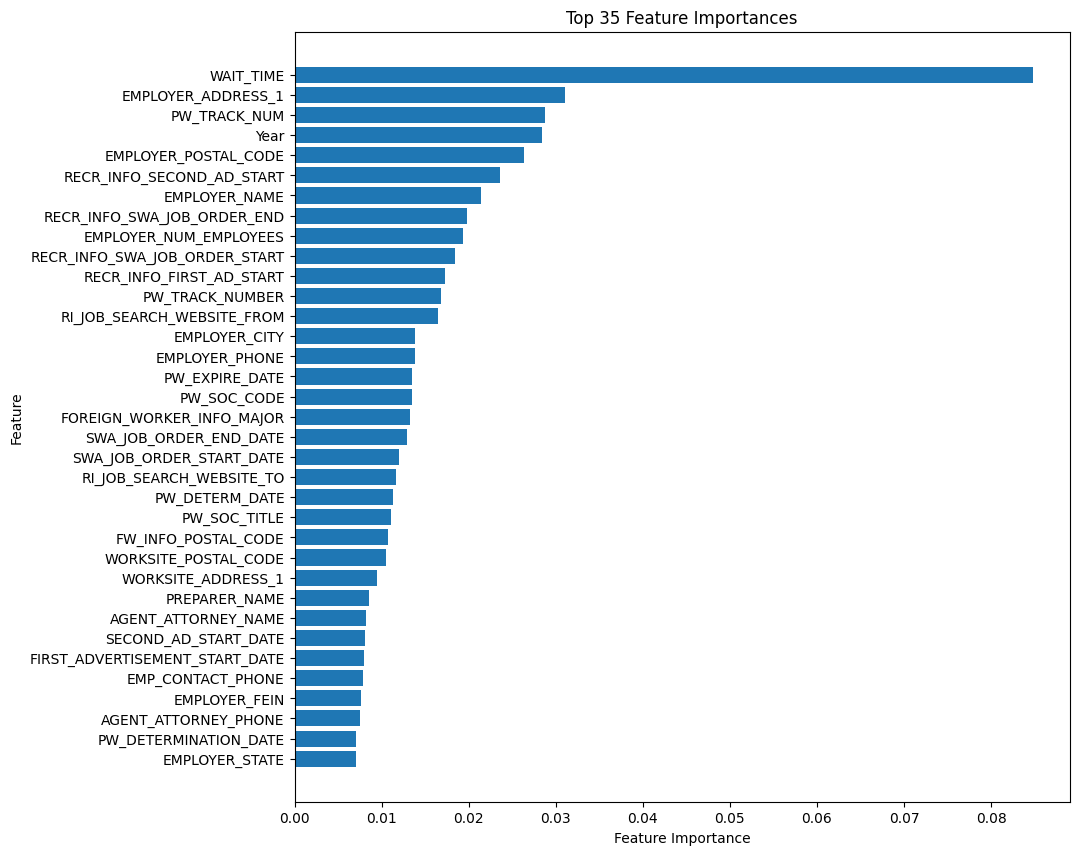

In [38]:
target_variable = "CASE_STATUS"  
is_classification = df_sampled[target_variable].dtype == 'object'

imputer = SimpleImputer(strategy="median")  
df_numeric = df_sampled.select_dtypes(include=['number']).copy()
df_numeric.iloc[:, :] = imputer.fit_transform(df_numeric)

# Label Encoding for Random Forest
df_categorical = df_sampled.select_dtypes(include=['object']).copy()
label_encoders = {}
for col in df_categorical.columns:
    le = LabelEncoder()
    df_categorical[col] = le.fit_transform(df_categorical[col].astype(str))
    label_encoders[col] = le

df_processed = pd.concat([df_numeric, df_categorical], axis=1)
X = df_processed.drop(columns=[target_variable])
y = df_sampled[target_variable]

# train
if is_classification:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

# get the importance of each 
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# show the 35 most important 
plt.figure(figsize=(10, 10))
plt.barh(feature_importances["Feature"][:35], feature_importances["Importance"][:35])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 35 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [39]:
feature_importances.to_csv('Case_importance_variables.csv')

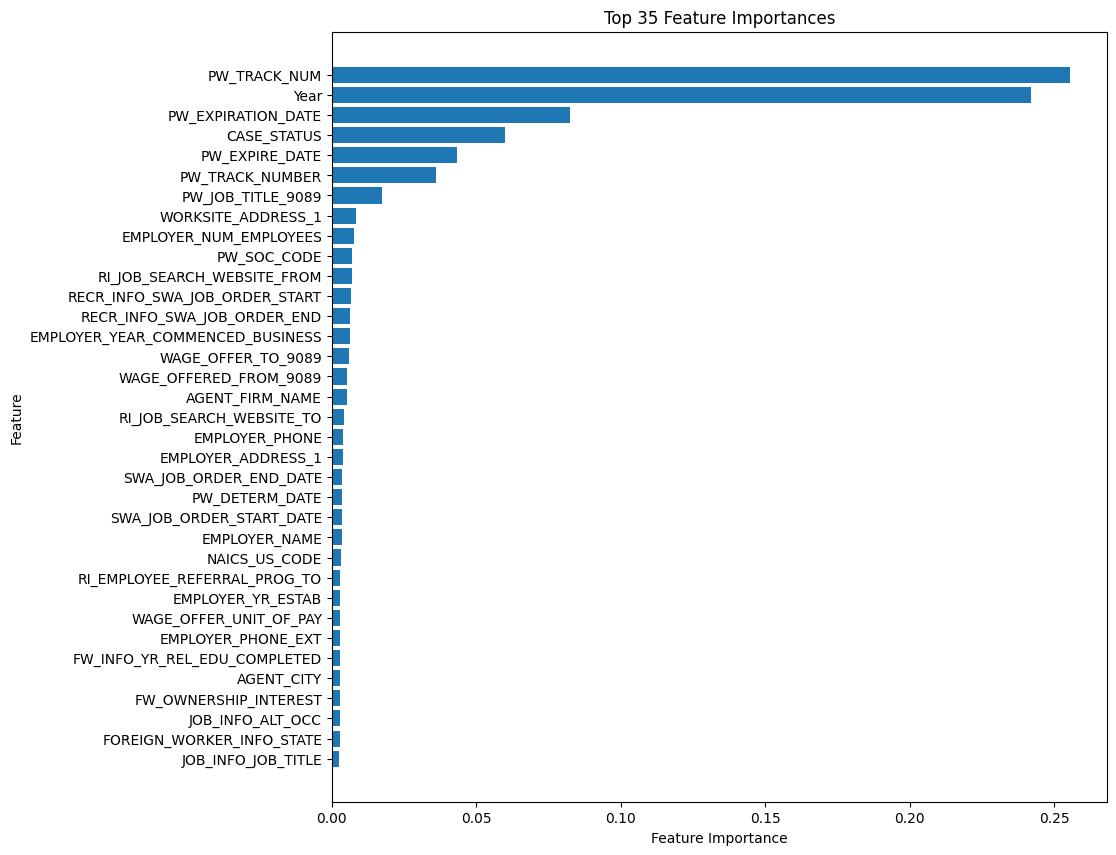

In [41]:
target_variable = "WAIT_TIME"  
is_classification = df_sampled[target_variable].dtype == 'object'

imputer = SimpleImputer(strategy="median")  
df_numeric = df_sampled.select_dtypes(include=['number']).copy()
df_numeric.iloc[:, :] = imputer.fit_transform(df_numeric)

# Label Encoding for Random Forest
df_categorical = df_sampled.select_dtypes(include=['object']).copy()
label_encoders = {}
for col in df_categorical.columns:
    le = LabelEncoder()
    df_categorical[col] = le.fit_transform(df_categorical[col].astype(str))
    label_encoders[col] = le

df_processed = pd.concat([df_numeric, df_categorical], axis=1)
X = df_processed.drop(columns=[target_variable])
y = df_sampled[target_variable]

# train
if is_classification:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

# get the importance of each 
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# show the 35 most important 
plt.figure(figsize=(10, 10))
plt.barh(feature_importances["Feature"][:35], feature_importances["Importance"][:35])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 35 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [42]:
feature_importances.to_csv('WaitTime_importance_variables.csv')

## 2. PCA